<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo**

-  Pia Antiquera
- Evelyn Silva

### **Link de repositorio de GitHub:** `https://github.com/piaantiquera/Courses-MDS7202.git`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [115]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [116]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Colab Notebooks/Lab ciencia de datos/datos_lab8'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [117]:
#coneccion a drive

try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    print('Ignorando conexión drive-colab')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab ciencia de datos/datos_lab8/fruit_vegetables.csv')
data.head()


,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [119]:
# prompt: dame los valores unicos de commodity

data['Commodity'].unique()


array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [120]:
# se hace la mascara
#primero hacemos una lista con las traducciones de los productos que quiere don sergio

productos_traduccion = {
    'Tomates': 'Tomato',
    'Lechuga': 'Lettuce',
    'Manzana': 'Apple',
    'Plátanos': 'Banana',
    'Tofu': 'Tofu'
}

# Crear una lista con los nombres de los productos en inglés
productos_ingles = list(productos_traduccion.values())

# Filtrar el DataFrame para obtener solo los productos que interesan a Don Sergio
mascara_productos = data['Commodity'].str.contains('|'.join(productos_ingles), case=False)


# Aplicar la máscara al DataFrame para mostrar solo los productos seleccionados
productos_seleccionados = data[mascara_productos]

# Filtrar para eliminar los productos que contienen "Pineapple"
productos_seleccionados = productos_seleccionados[~productos_seleccionados['Commodity'].str.contains('Pineapple', case=False)]


# Mostrar los productos seleccionados
print(productos_seleccionados.head())


    SN            Commodity        Date Unit  Minimum  Maximum  Average
0    0   Tomato Big(Nepali)  2013-06-16   Kg     35.0     40.0     37.5
1    1  Tomato Small(Local)  2013-06-16   Kg     26.0     32.0     29.0
40  40              Lettuce  2013-06-16   Kg     55.0     60.0     57.5
48  48                 Tofu  2013-06-16   Kg     55.0     60.0     57.5
50  50        Apple(Jholey)  2013-06-16   Kg    100.0    120.0    110.0


In [121]:
# Convertir plátanos de docenas a kilogramos, asumiendo que hay 7 plátanos por kilogramo
conversion_doz_kg = 12 / 7

# Filtrar los productos de plátanos
bananas = productos_seleccionados[productos_seleccionados['Commodity'].str.contains('Banana', case=False)]

# Convertir los valores de Minimum, Maximum y Average para plátanos
bananas['Minimum'] = bananas['Minimum'] / conversion_doz_kg
bananas['Maximum'] = bananas['Maximum'] / conversion_doz_kg
bananas['Average'] = bananas['Average'] / conversion_doz_kg
bananas['Unit'] = 'Kg'

# Reemplazar los valores en el DataFrame original
productos_seleccionados.update(bananas)

# Mostrar los productos de plátanos ajustados
productos_seleccionados.head(30)

<ipython-input-121-4115f7926c32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bananas['Minimum'] = bananas['Minimum'] / conversion_doz_kg
<ipython-input-121-4115f7926c32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bananas['Maximum'] = bananas['Maximum'] / conversion_doz_kg
<ipython-input-121-4115f7926c32>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.000000,40.000000,37.50
1,1,Tomato Small(Local),2013-06-16,Kg,26.000000,32.000000,29.00
40,40,Lettuce,2013-06-16,Kg,55.000000,60.000000,57.50
48,48,Tofu,2013-06-16,Kg,55.000000,60.000000,57.50
50,50,Apple(Jholey),2013-06-16,Kg,100.000000,120.000000,110.00
51,51,Banana,2013-06-16,Kg,40.833333,46.666667,43.75
74,74,Tomato Big(Nepali),2013-06-17,Kg,25.000000,30.000000,27.50
75,75,Tomato Small(Local),2013-06-17,Kg,20.000000,25.000000,22.50
113,113,Lettuce,2013-06-17,Kg,45.000000,50.000000,47.50
121,121,Tofu,2013-06-17,Kg,55.000000,60.000000,57.50


In [122]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo

# Agrupar por fecha y sumar los valores de la columna Average
serie_tiempo = productos_seleccionados.groupby('Date')['Average'].sum()

# Mostrar la serie de tiempo
print(serie_tiempo.head())


Date
2013-06-16    335.25
2013-06-17    318.75
2013-06-18    305.25
2013-06-19    327.25
2013-06-20    315.25
Name: Average, dtype: float64


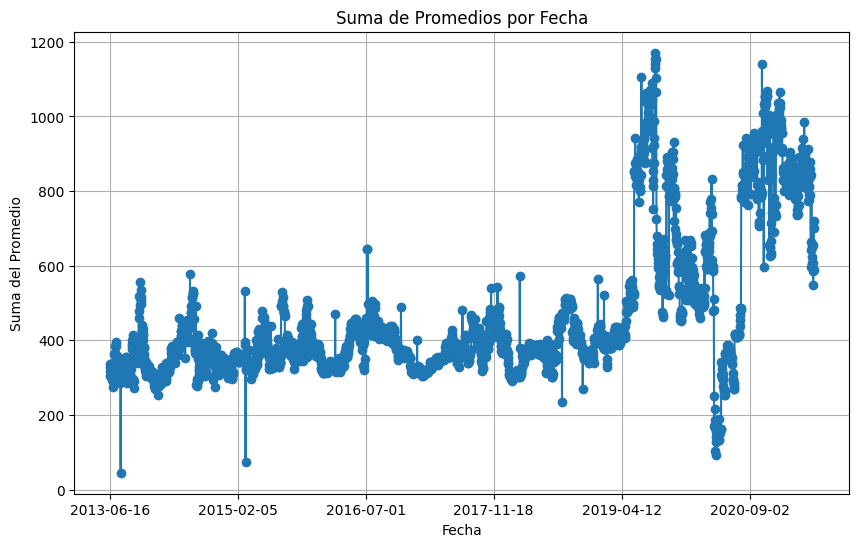

In [123]:
# Graficar serie de tiempo
plt.figure(figsize=(10, 6))
serie_tiempo.plot(kind='line', marker='o')
plt.title('Suma de Promedios por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Suma del Promedio')
plt.grid(True)
plt.show()

El gráfico muestra la suma de promedios de ciertos datos desde 2013 hasta 2020, destacando fluctuaciones notables y una tendencia de aumento gradual hacia el final. Los picos y las periodicidades sugieren influencias estacionales o eventos específicos que afectan los datos, con un marcado aumento en los valores hacia 2020, posiblemente debido a circunstancias externas como la pandemia de COVID-19.

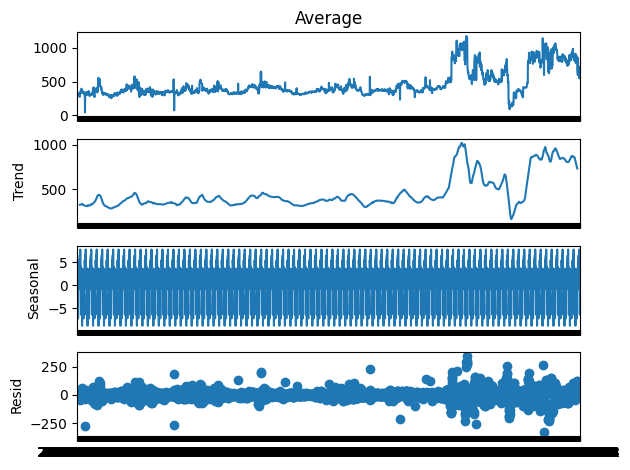

In [124]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición de la señal
result = seasonal_decompose(serie_tiempo, model='additive', period=30)

# Mostrar los componentes de la descomposición
result.plot()
plt.show()

**Periodo = 30**; En este caso, muchos patrones de consumo de alimentos y sus precios en el mercado siguen ciclos mensuales debidos a dactores de produccion y estacionalidad y en este caso tenemos frutas y verduras que pertenecen a este grupo. Es por esto que se definio un periodo de 30 dias se considero el mas adecuado poara capturar variaciones.  

**Explicacion del grafico**
* Promedio: Muestra la serie original con fluctuaciones evidentes.
* Tendencia: Indica un comportamiento estable de los datos con un aumento hacia el final.
* Estacionalidad: Revela patrones que se repiten anualmente, indicando efectos estacionales claros.
* esiduos: Representa las diferencias entre los datos reales y el modelo, mostrando variabilidad sin un patrón claro, lo que sugiere que la mayoría de las tendencias y patrones estacionales han sido efectivamente capturados por el modelo.

In [125]:

# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_size = int(len(serie_tiempo) * 0.8)
train, test = serie_tiempo[:train_size], serie_tiempo[train_size:]

# Mostrar las divisiones
print("Conjunto de entrenamiento:")
print(train.tail())
print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
Date
2019-10-26    862.916667
2019-10-27    905.416667
2019-10-28    845.416667
2019-10-29    905.416667
2019-10-30    775.416667
Name: Average, dtype: float64

Conjunto de prueba:
Date
2019-10-31    885.416667
2019-11-01    930.416667
2019-11-02    719.583333
2019-11-03    807.083333
2019-11-04    809.583333
Name: Average, dtype: float64


#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [126]:
#instalamos prophet
!pip install prophet

In [127]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [128]:
# # Crear dataset para Prophet

df_train = pd.DataFrame({'ds': train.index, 'y': train.values})
df_test = pd.DataFrame({'ds': test.index, 'y': test.values})

**2. Modelo y entrenamiento**

In [129]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(train_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/6ys23a2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/oc75ml8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62437', 'data', 'file=/tmp/tmpemp85bqw/6ys23a2e.json', 'init=/tmp/tmpemp85bqw/oc75ml8_.json', 'output', 'file=/tmp/tmpemp85bqw/prophet_modelvg4rn98r/prophet_model-20240527030754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:07:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [130]:
# Crear dataframe de predicción
future = model.make_future_dataframe(periods=len(test_prophet))

# Generar predicciones
forecast = model.predict(future)

# Convertir la columna 'ds' al formato 'YYYY_MM_DD'
forecast['ds'] = forecast['ds'].dt.strftime('%Y-%m-%d')

# Mostrar las primeras filas del dataframe de predicción
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-06-16,45.403523,14.604374,74.352368,45.403523,45.403523,-0.407440,-0.407440,-0.407440,-0.004918,-0.004918,-0.004918,-0.402522,-0.402522,-0.402522,0.0,0.0,0.0,44.996082
1,2013-06-17,45.449953,11.387548,75.197217,45.449953,45.449953,-0.789483,-0.789483,-0.789483,-0.276522,-0.276522,-0.276522,-0.512961,-0.512961,-0.512961,0.0,0.0,0.0,44.660470
2,2013-06-18,45.496384,14.174584,76.024353,45.496384,45.496384,-0.673600,-0.673600,-0.673600,-0.084265,-0.084265,-0.084265,-0.589334,-0.589334,-0.589334,0.0,0.0,0.0,44.822784
3,2013-06-19,45.542815,16.007442,76.230115,45.542815,45.542815,-0.207717,-0.207717,-0.207717,0.424428,0.424428,0.424428,-0.632145,-0.632145,-0.632145,0.0,0.0,0.0,45.335098
4,2013-06-20,45.589246,15.351943,74.364407,45.589246,45.589246,-0.951234,-0.951234,-0.951234,-0.308660,-0.308660,-0.308660,-0.642574,-0.642574,-0.642574,0.0,0.0,0.0,44.638012


* ds: Fecha de la predicción.
* yhat: Predicción puntual.
* yhat_lower: Límite inferior del intervalo de predicción.
* yhat_upper: Límite superior del intervalo de predicción.
* trend: Componente de tendencia de la predicción.
* trend_lower: Límite inferior del componente de tendencia.
* trend_upper: Límite superior del componente de tendencia.
* additive_terms: Componentes aditivos de la predicción.
* additive_terms_lower: Límite inferior de los componentes aditivos.
* additive_terms_upper: Límite superior de los componentes aditivos.
* weekly: Componente estacional semanal.
* weekly_lower: Límite inferior del componente estacional semanal.
* weekly_upper: Límite superior del componente estacional semanal.
* multiplicative_terms: Componentes multiplicativos de la predicción.
* yearly: Componente estacional anual.
* yearly_lower: Límite inferior del componente estacional anual.
* yearly_upper: Límite superior del componente estacional anual.
* multiplicative_terms: Componentes multiplicativos de la predicción.
* multiplicative_terms_lower: Límite inferior de los componentes multiplicativos.
* multiplicative_terms_upper: Límite superior de los componentes multiplicativos.


**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

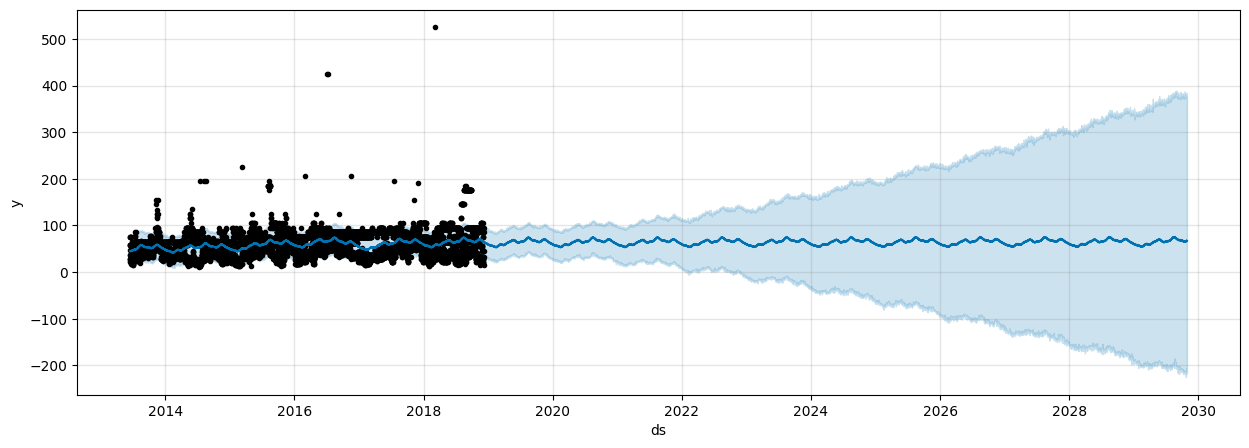

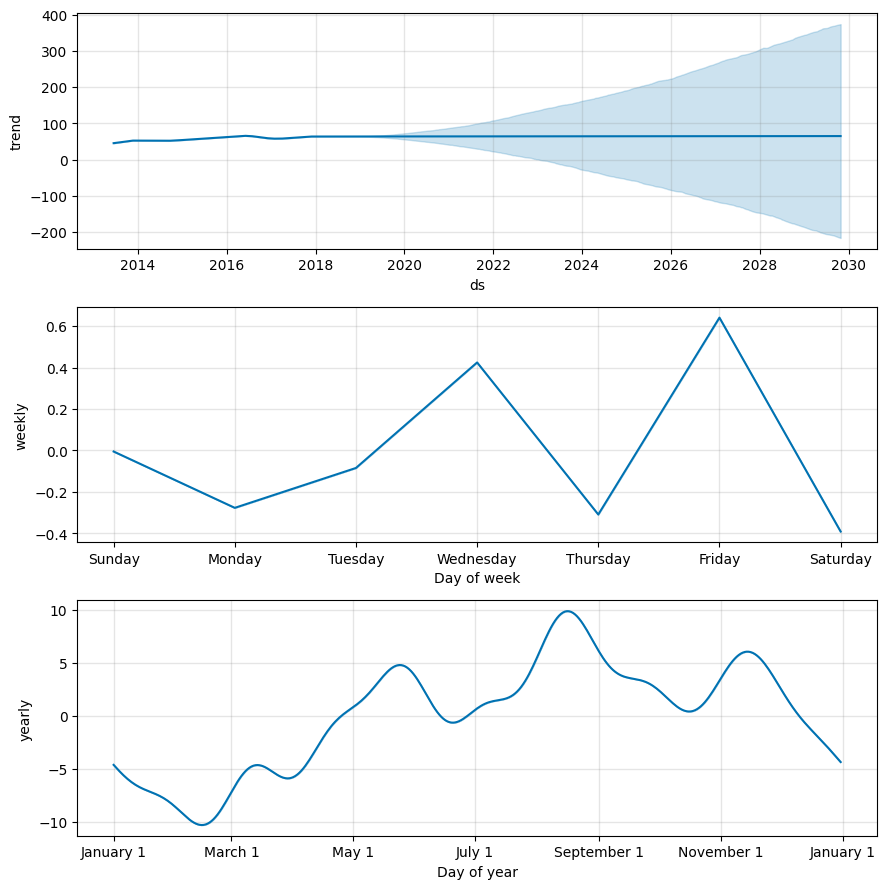

In [131]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'ds' esté en formato datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Graficar las predicciones del modelo
f, ax = plt.subplots(1, 1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

# Descomposición por componentes
fig2 = model.plot_components(forecast)
plt.show()


En los gráficos vemos:



*   Linea azul: la prediccion para el modelo en la temporalidad indicada
*   Sombra azul: es el intervalo de confianza que muestra el rango de incertidumbre alrededor de las predicciones. en el primer y segundo grafico hace sentido que a media que pasa el tiempo esta área sea mas grande dado que esa temporalidades se alejan mucho de los datos reales.
*  Puntos negros: son los datos reales



#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/ossock16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/lp9n3v8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77128', 'data', 'file=/tmp/tmpemp85bqw/ossock16.json', 'init=/tmp/tmpemp85bqw/lp9n3v8t.json', 'output', 'file=/tmp/tmpemp85bqw/prophet_modelzy_qhx6e/prophet_model-20240527030837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


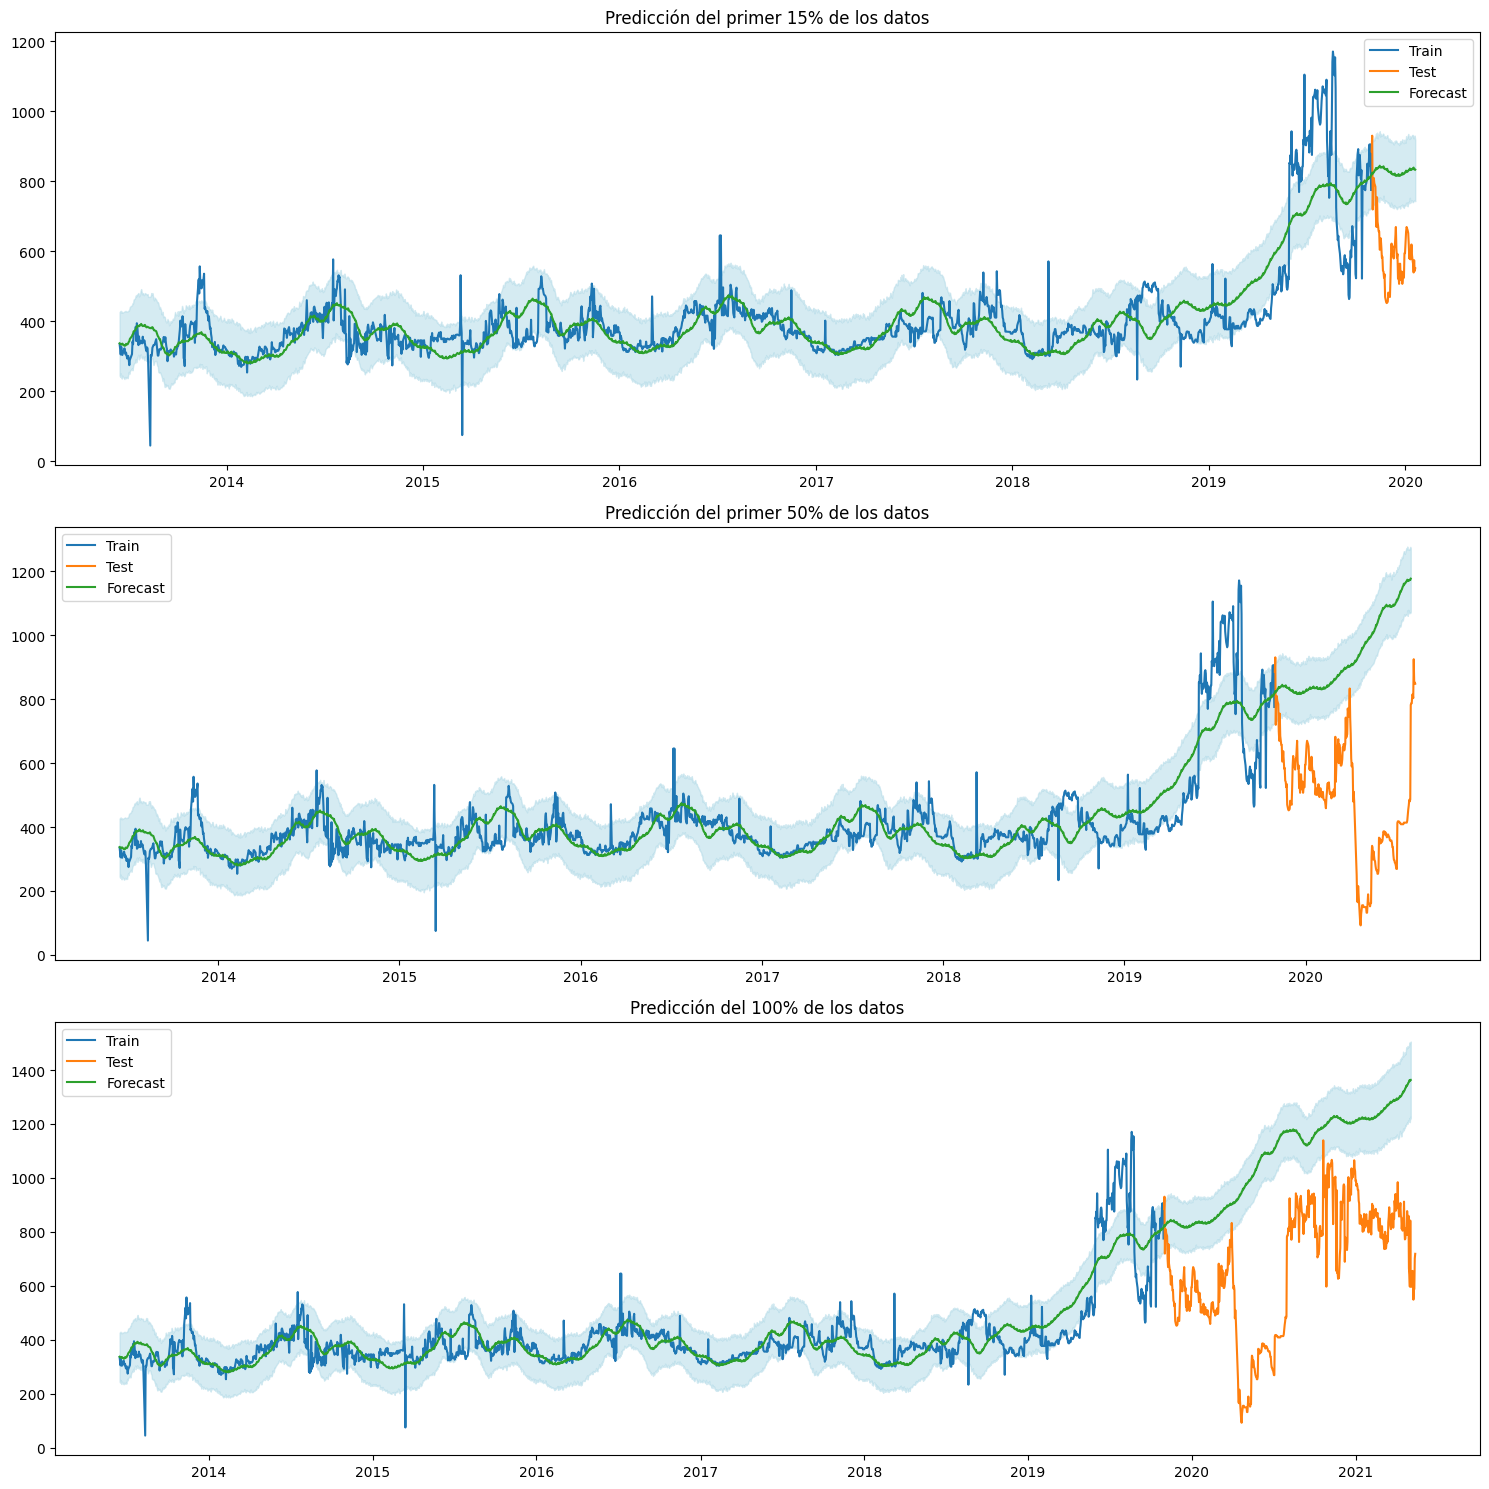

In [133]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(df_train)

# Crear dataframe de predicción
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

# Asegurarse de que las fechas en forecast estén en el formato correcto
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Calcular los puntos de corte para las tres vistas
first_15_percent = int(len(df_test) * 0.15)
first_50_percent = int(len(df_test) * 0.50)
first_100_percent = len(df_test)

# Crear las tres vistas
first_15_forecast = forecast.iloc[:len(df_train) + first_15_percent]
first_50_forecast = forecast.iloc[:len(df_train) + first_50_percent]
first_100_forecast = forecast

# Graficar las predicciones junto con los datos reales
f, axes = plt.subplots(3, 1, figsize=(15, 15))

# Gráfico para el primer 15% de los datos de prueba
axes[0].plot(df_train['ds'], df_train['y'], label='Train')
axes[0].plot(df_test['ds'].iloc[:first_15_percent], df_test['y'].iloc[:first_15_percent], label='Test')
axes[0].plot(first_15_forecast['ds'], first_15_forecast['yhat'], label='Forecast')
axes[0].fill_between(first_15_forecast['ds'], first_15_forecast['yhat_lower'], first_15_forecast['yhat_upper'], color='lightblue', alpha=0.5)
axes[0].set_title('Predicción del primer 15% de los datos')
axes[0].legend()

# Gráfico para el primer 50% de los datos de prueba
axes[1].plot(df_train['ds'], df_train['y'], label='Train')
axes[1].plot(df_test['ds'].iloc[:first_50_percent], df_test['y'].iloc[:first_50_percent], label='Test')
axes[1].plot(first_50_forecast['ds'], first_50_forecast['yhat'], label='Forecast')
axes[1].fill_between(first_50_forecast['ds'], first_50_forecast['yhat_lower'], first_50_forecast['yhat_upper'], color='lightblue', alpha=0.5)
axes[1].set_title('Predicción del primer 50% de los datos')
axes[1].legend()

# Gráfico para el 100% de los datos de prueba
axes[2].plot(df_train['ds'], df_train['y'], label='Train')
axes[2].plot(df_test['ds'], df_test['y'], label='Test')
axes[2].plot(first_100_forecast['ds'], first_100_forecast['yhat'], label='Forecast')
axes[2].fill_between(first_100_forecast['ds'], first_100_forecast['yhat_lower'], first_100_forecast['yhat_upper'], color='lightblue', alpha=0.5)
axes[2].set_title('Predicción del 100% de los datos')
axes[2].legend()

plt.tight_layout()
plt.show()



1. **15% de los datos**: Aquí se observa una alineación inicial muy precisa entre las predicciones y los datos reales durante el primer segmento del conjunto de prueba, con divergencias que comienzan a aparecer a medida que se avanza en el tiempo.

2. **50% de los datos**: Este gráfico muestra una predicción que coincide bien con la tendencia hasta mediados del período de prueba, después de lo cual las predicciones comienzan a divergir significativamente hacia arriba comparado con los datos reales.

3. **100% de los datos**: El modelo sigue la tendencia y la temporada del conjunto de entrenamiento bien, y continúa de manera coherente en el conjunto de prueba. La línea de predicción muestra una proyección ascendente significativa, divergiendo notablemente hacia el final.

En general, los gráficos sugieren que el modelo es capaz de capturar la tendencia y estacionalidad de los datos hasta cierto punto, pero parece sobreestimar o divergir a medida que se extiende hacia el futuro, especialmente en el escenario donde se considera el 100% de los datos.

In [139]:

# Calcular las otras métricas de error
rmse = mean_squared_error(df_test['y'], forecast_test['yhat'], squared=False)
mae = mean_absolute_error(df_test['y'], forecast_test['yhat'])



print(f"RMSE: {rmse}")
print(f"MAE: {mae}")



RMSE: 652.4286467943932
MAE: 608.8656152337677


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [140]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir las festividades recurrentes (sin especificar año)
festividades = [
    '01-01',  # Año Nuevo
    '05-01',  # Día del Trabajo
    '05-21',  # Día naval
    '07-16',  # Virgen del Carmen
    '08-15',  # asuncion de la virgen
    '09-18',  # Fiestas Patrias 1
    '09-19',  # Fiestas Patrias 2
    '10-31',  # dia de todos los muertos
    '11-01',  # dia de todos los santos
    '12-08',  # dia de la inmaculada concepcion
    '12-25'   # Navidad
]

# Crear un rango de años para las festividades
years = pd.date_range(start='2018-01-01', end='2025-12-31', freq='YS').year

# Crear DataFrame de festividades para varios años
holiday_dates = []
for year in years:
    for fest in festividades:
        holiday_dates.append(f'{year}-{fest}')

chile_holidays = pd.DataFrame({
    'holiday': 'chilean_holidays',
    'ds': pd.to_datetime(holiday_dates),
    'lower_window': 0,
    'upper_window': 1,
})

# Crear y entrenar el modelo Prophet con las festividades
model_holidays = Prophet(holidays=chile_holidays)
model_holidays.fit(df_train)

# Crear dataframe de predicción
future_holidays = model_holidays.make_future_dataframe(periods=len(df_test))
forecast_holidays = model_holidays.predict(future_holidays)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/ig1kfo7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/a1_flui1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58120', 'data', 'file=/tmp/tmpemp85bqw/ig1kfo7v.json', 'init=/tmp/tmpemp85bqw/a1_flui1.json', 'output', 'file=/tmp/tmpemp85bqw/prophet_modelg2kbq6eb/prophet_model-20240527031544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**2. Predecir**

In [145]:
import pandas as pd
from prophet import Prophet


model_holidays = Prophet(holidays=chile_holidays)
model_holidays.fit(df_train)

future_dates = model_holidays.make_future_dataframe(periods=len(df_test), include_history=False)

forecast = model_holidays.predict(future_dates)

# Asegúrate de que la columna 'ds' en df_test y forecast esté en formato datetime para un correcto merge/join
df_test['ds'] = pd.to_datetime(df_test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Unir los resultados de la predicción con los datos reales para comparar
results = df_test.merge(forecast, on='ds', how='inner')

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(results['y'], results['yhat'], squared=False)
mae = mean_absolute_error(results['y'], results['yhat'])
mape = (abs((results['y'] - results['yhat']) / results['y']).mean()) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/tjx3iea0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/ktle7rt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91536', 'data', 'file=/tmp/tmpemp85bqw/tjx3iea0.json', 'init=/tmp/tmpemp85bqw/ktle7rt9.json', 'output', 'file=/tmp/tmpemp85bqw/prophet_modelry32a8wn/prophet_model-20240527032121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 448.769265367734
MAE: 401.13276866223015
MAPE: 93.20238209638248%


**3. Resultados**

In [ ]:

# Obtener las predicciones correspondientes al conjunto de prueba
forecast_test_holidays = forecast_holidays.set_index('ds').loc[df_test['ds'].values]

# Asegurarse de que las fechas coinciden en ambos DataFrames
df_test = df_test.set_index('ds')
forecast_test_holidays = forecast_test_holidays.loc[df_test.index]

# Calcular las métricas de error para el modelo con festividades
rmse_holidays = mean_squared_error(df_test['y'], forecast_test_holidays['yhat'], squared=False)
mae_holidays = mean_absolute_error(df_test['y'], forecast_test_holidays['yhat'])
mape_holidays = (abs((df_test['y'] - forecast_test_holidays['yhat']) / df_test['y']).mean()) * 100

# Resultados anteriores (sin festividades)
rmse = mean_squared_error(df_test['y'], forecast_test['yhat'], squared=False)
mae = mean_absolute_error(df_test['y'], forecast_test['yhat'])
mape = (abs((df_test['y'] - forecast_test['yhat']) / df_test['y']).mean()) * 100

# Tabla de comparación de resultados
results = pd.DataFrame({
    'Model': ['Without Holidays', 'With Holidays'],
    'RMSE': [rmse, rmse_holidays],
    'MAE': [mae, mae_holidays],
    'MAPE': [mape, mape_holidays]
})

print(results)


¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

El segundo modelo con las festividades con RMSE de 448.769 y MAE de 401.133 supera significativamente al primer modelo sin festividades , que tiene RMSE de 652.429 y MAE de 608.866. Esto indica que el segundo modelo es más preciso y consistente en sus predicciones. Sin embargo, el MAPE de 93.202% del segundo modelo sugiere que aún hay espacio para mejorar en términos de la precisión porcentual de las predicciones.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [146]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir las fechas de inicio y fin del invierno
start_invierno = '06-21'
end_invierno = '09-21'

# Crear el regresor para las fechas de invierno
def is_invierno(date):
    return 1 if start_invierno <= date.strftime('%m-%d') <= end_invierno else 0

# Aplicar el regresor al DataFrame de entrenamiento y prueba
df_train['is_invierno'] = df_train['ds'].apply(lambda x: is_invierno(x))
df_test['is_invierno'] = df_test['ds'].apply(lambda x: is_invierno(x))

# Mostrar los primeros registros para verificar
print(df_train.head())
print(df_test.head())


          ds       y  is_invierno
0 2013-06-16  335.25            0
1 2013-06-17  318.75            0
2 2013-06-18  305.25            0
3 2013-06-19  327.25            0
4 2013-06-20  315.25            0
          ds           y  is_invierno
0 2019-10-31  885.416667            0
1 2019-11-01  930.416667            0
2 2019-11-02  719.583333            0
3 2019-11-03  807.083333            0
4 2019-11-04  809.583333            0


In [147]:

# Crear y entrenar el modelo Prophet con el regresor de invierno
model_invierno = Prophet()
model_invierno.add_regressor('is_invierno')
model_invierno.fit(df_train)

# Crear dataframe de predicción
future_invierno = model_invierno.make_future_dataframe(periods=len(df_test))
future_invierno['is_invierno'] = future_invierno['ds'].apply(lambda x: is_invierno(x))

# Generar predicciones
forecast_invierno = model_invierno.predict(future_invierno)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/8gzbw3v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemp85bqw/gdk73iog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56608', 'data', 'file=/tmp/tmpemp85bqw/8gzbw3v7.json', 'init=/tmp/tmpemp85bqw/gdk73iog.json', 'output', 'file=/tmp/tmpemp85bqw/prophet_modelvpi11j6j/prophet_model-20240527032849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


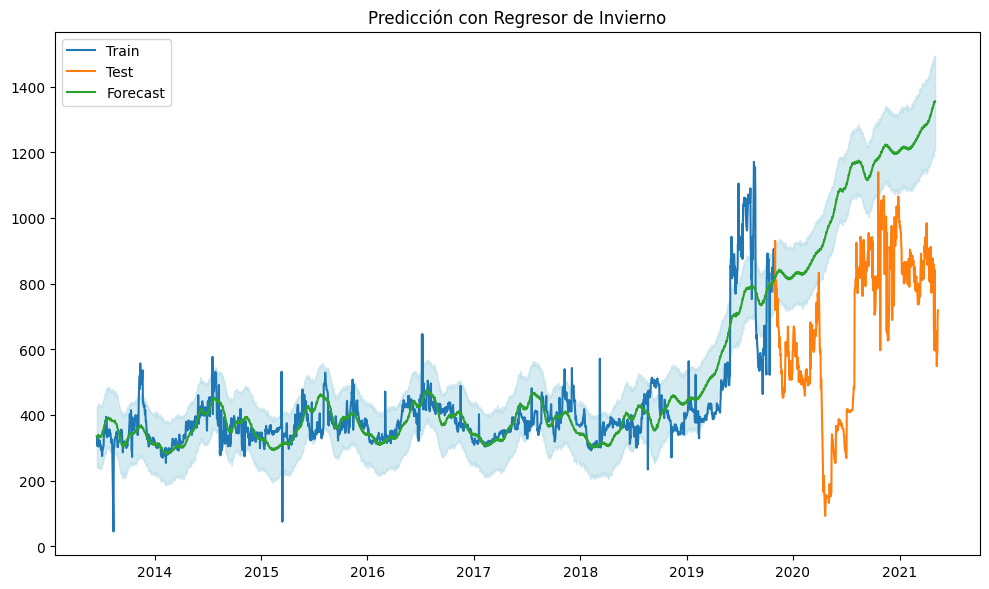

In [148]:

# Graficar las predicciones junto con los datos reales
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_train['ds'], df_train['y'], label='Train')
ax.plot(df_test['ds'], df_test['y'], label='Test')
ax.plot(forecast_invierno['ds'], forecast_invierno['yhat'], label='Forecast')
ax.fill_between(forecast_invierno['ds'], forecast_invierno['yhat_lower'], forecast_invierno['yhat_upper'], color='lightblue', alpha=0.5)
ax.set_title('Predicción con Regresor de Invierno')
ax.legend()

plt.tight_layout()
plt.show()

El gráfico muestra que el modelo con regresor de invierno no predice bien hacia el final del período de prueba, ya que las predicciones caen bruscamente mientras que la tendencia previa era ascendente. Esto sugiere que el modelo podría estar sobreestimando el efecto del invierno o no se está adaptando bien a cambios recientes en los datos desde 2020. La discrepancia entre las predicciones y los datos reales indica que el modelo tiene dificultades para proyectar con precisión bajo condiciones cambiantes.

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [ ]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-macosx_11_0_arm64.whl size=501928 sha256=c680a31f526f871707825444ccf5ec9c2b7dca37abf29feac6614cb47db3c109
  Stored in directory: /Users/piaal/Library/Caches/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [ ]:
df = pd.read_parquet('ratings_Electronics.parquet')
print(df.shape)
df.head()

(164007, 3)


,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [ ]:
# Respuesta

### Cantidad de valores unicos en la columna user_id
df_uniques = df['user_id'].nunique()
print('--------------------------------------')
print('Cantidad de únicos en la columna user_id')
print(df_uniques)


### Cantidad de valores unicos en la columna prod_id
df_uniques = df['prod_id'].nunique()
print('--------------------------------------')
print('Cantidad de únicos en la columna prod_id')
print(df_uniques)

--------------------------------------
Cantidad de únicos en la columna user_id
8014
--------------------------------------
Cantidad de únicos en la columna prod_id
6727


Verificar que no hayan valores nulos

In [ ]:
# Respuesta

### Cantidad de valores nulos por columna
df_nulls = df.isnull().sum()
print('--------------------------------------')
print('Cantidad de nulos por columna')
print(df_nulls)

--------------------------------------
Cantidad de nulos por columna
user_id    0
prod_id    0
rating     0
dtype: int64


Graficar distribución de los ratings

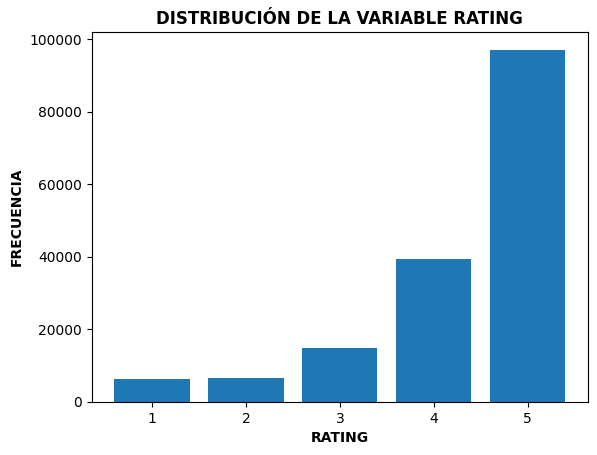

In [ ]:
# Respuesta
import matplotlib.pyplot as plt

frecuencia_ratings = df['rating'].value_counts()
frecuencia_ratings = frecuencia_ratings.sort_index()
plt.bar(frecuencia_ratings.index, frecuencia_ratings.values)
plt.xlabel('RATING', fontweight='bold')
plt.ylabel('FRECUENCIA', fontweight='bold')
plt.title('DISTRIBUCIÓN DE LA VARIABLE RATING', fontweight='bold')
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [ ]:
# Respuesta

### Top 5 usuarios
# Contar la frecuencia de cada user_id
frec_users = df['user_id'].value_counts()
# Seleccionar los 5 user_id más frecuentes
top_users = frec_users.head(5)
print('--------------------------------------')
print('Top de 5 usuarios con mayores interacciones y su frecuencia')
print('user_id| Frequency')
print(top_users)

### Top 5 productos
# Contar la frecuencia de cada prod_id
frec_prods = df['prod_id'].value_counts()
# Seleccionar los 5 user_id más frecuentes
top_prods = frec_prods.head(5)
print('--------------------------------------')
print('Top de 5 productos con mayores interacciones y su frecuencia')
print('prod_id| Frequency')
print(top_prods)

--------------------------------------
Top de 5 usuarios con mayores interacciones y su frecuencia
user_id| Frequency
6703    283
5732    217
6273    206
1414    199
4665    179
2446    177
5530    169
6914    169
7827    164
2256    163
Name: user_id, dtype: int64
--------------------------------------
Top de 5 productos con mayores interacciones y su frecuencia
prod_id| Frequency
5130    611
2843    542
5244    395
2525    371
6290    362
Name: prod_id, dtype: int64


Observaciones de los datos:

1. Notamos que de un total de 164007 registros, se tienen 8014 usuarios unicos y 6727 productos unicos por lo tanto, es de esperar que los registros contengan multiples registros por usuario y por producto lo que lo hace una base de datos adecuada para este tipo de tarea de aprendizaje automático.
2. Notamos que el rating no presenta una distribución normal en sus valores sino que tiene una distribución similar a una distribución de Weibull asimetrica al estar concentrada en los valores extremos máximos del rango.
3. Notamos que en el top de los 5 usuarios, se tiene un 0.66% de los registros por lo tanto no se observa una concentración significativa de registros en ciertos usuarios.
4. De igual forma, notamos que en el top de los 5 productos, se tiene un 1.3% de los registros por lo tanto no se observa una concentración de registros en ciertos productos.


## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [ ]:
import random

# Fijar la semilla
random.seed(42)

# Definir la escala de rating
reader = Reader(rating_scale=(0,5))
# Definir el df
df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [ ]:
from surprise.model_selection import train_test_split

# Respuesta

# Separar los datos en conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(dataset, test_size=0.3, random_state=42)

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

Obs: Usamos MAE en lugar de MSE para una interpretación mas generalizada considerando el contexto de la tarea de recomendación (según lo que vimos en clases).

In [ ]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta

# Entrenar el modelo NormalPredictor
model = NormalPredictor()
model.fit(trainset)

# Generar predicciones sobre el conjunto de prueba
predictions = model.test(testset)

#pd.DataFrame(predictions)


In [ ]:
# Evaluar con MAE
from surprise.accuracy import mae
mae_baseline = mae(predictions)
print(f"Error cuadrático medio del modelo NormalPredictor: {mae_baseline:.4f}")


MAE:  0.9866
Error cuadrático medio del modelo NormalPredictor: 0.9866


Considerando que, como se observo en el EDA, la distribución de la variable rating no sigue una distribución normal, sabemos que el algoritmo no tendrá un buen desempeño a priori. Lo anterior ya que no utiliza información sobre los usuarios o los productos, sino que simplemente predice una calificación aleatoria basada en la media y la desviación estándar de las calificaciones en el conjunto de entrenamiento.

Luego, observando el MAE, notamos que efectivamente el algoritmo NormalPredictor() no tiene un buen desempeño. Lo anterior, dado que presenta un MAE de 0.99 y considerando que el rating va de 0 a 5, esto indica que las predicciones están, en promedio, a casi 1 punto de las calificaciones reales, lo cual puede ser un error significativo si se desea alta precisión como para el caso de estas predicciones.


## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [ ]:
def get_user_top_k(predictions, user, n=10):
    # Filtrar predicciones para un usuario específico
    predicted_ratings = [(iid, est) for uid, iid, true_r, est, _ in predictions if uid == user]

    # Ordenar predicciones segun el rating estimado
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)

    # Obtener el top k predicciones para el usuario
    top_k_predictions = predicted_ratings[:n]

    return top_k_predictions


In [ ]:
from surprise.accuracy import mse

# ----------------------------------------------------------------------------------------
### Filtrado colaborativo KNN enfocado en el usuario
# Definir algoritmo
sim_options_user = {'name': 'cosine', 'user_based': True}

# Implementar algoritmo
user_model = KNNBasic(sim_options=sim_options_user)

# Entrenar algoritmo en el subconjunto de entrenamiento
user_model.fit(trainset)

# Generar predicciones en el subconjunto de testeo: dataframe con el rating estimado para cada (user_id, item_id)
predictions_user = user_model.test(testset)
#predictions_user = pd.DataFrame(predictions_user)

# Evaluar rendimiento
mae_user_model = mae(predictions_user)
print(f"Error cuadrático medio del modelo KNN enfocado en el usuario: {mae_user_model:.4f}")

# ----------------------------------------------------------------------------------------
### Filtrado colaborativo KNN basado en el producto

# Definir algoritmo
sim_options_product = {'name': 'cosine', 'user_based': False}

# Implementar algoritmo
product_model = KNNBasic(sim_options=sim_options_product)

# Generar predicciones en el subconjunto de entrenamiento
product_model.fit(trainset)

# Predecir en el subconjunto de testeo; dataframe con el rating estimado para cada (user_id, item_id)
predictions_product = product_model.test(testset)
#predictions_product = pd.DataFrame(predictions_product)

# Evaluar rendimiento
mae_product_model = mae(predictions_product)
print(f"Error cuadrático medio del modelo KNN enfocado en el producto: {mae_product_model:.4f}")



Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7646
Error cuadrático medio del modelo KNN enfocado en el usuario: 0.7646
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7535
Error cuadrático medio del modelo KNN enfocado en el producto: 0.7535


In [ ]:
example = [(3, 3906, None)]
user_id = 3
product_id = 3906
### Obtener la estimación de rating con el modelo KNN enfocado en el usuario
preds_based_on_user = user_model.test(example)
print(f'Prediccion de rating para el usuario de id {user_id} y el producto de id {product_id} usando enfoque basado en usuario')
print(preds_based_on_user)

### Obtener la estimación de rating con el modelo KNN enfocado en el producto
preds_based_on_prod = product_model.test(example)
print(f'Prediccion de rating para el usuario de id {user_id} y el producto de id {product_id} usando enfoque basado en producto')
print(preds_based_on_prod)

Prediccion de rating para el usuario de id 3 y el producto de id 3906 usando enfoque basado en usuario
[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]
Prediccion de rating para el usuario de id 3 y el producto de id 3906 usando enfoque basado en producto
[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


In [ ]:
user_example = 2170
### Predicciones con el modelo KNN enfocado en el usuario
print(f'Top 5 recomendaciones de productos para el usuario {user_example} con modelo enfocado en usuario')
top5_user = get_user_top_k(predictions_user, user = user_example, n = 5)
print(top5_user)

### Predicciones con el modelo KNN enfocado en el producto
print(f'Top 5 recomendaciones de productos para el usuario {user_example} con modelo enfocado en producto')
top5_prod = get_user_top_k(predictions_product, user = user_example, n = 5)
print(top5_prod)

Top 5 recomendaciones de productos para el usuario 2170 con modelo enfocado en usuario
[(2679, 5), (1326, 4.799755049750801), (4650, 4.399861310283875), (1692, 4.333333333333333), (4363, 4.199459547276517)]
Top 5 recomendaciones de productos para el usuario 2170 con modelo enfocado en producto
[(1692, 5), (1326, 5), (2679, 5), (3595, 4.857142857142857), (4650, 4.856937449847549)]


----------------------------------------------------------------------------
A partir del rendimiento de cada enfoque en relación al MAE obtenido, notamos que:
- Ambos modelos presentan un rendimiento mejor que el modelo baseline.
- El modelo con enfoque en el producto tiene un mejor rendimiento que el modelo con enfoque en el usuario.

----------------------------------------------------------------------------
En base a la predicción del rating del usuario 3 al producto 3906, notamos que:
- El modelo con enfoque en el usuario predice un rating de 3.38 aprox
- El modelo con enfoque en el producto predice un rating de 2.5 aprox.

Considerando lo anterior, efectivamente se tienen predicciones distintas desde cada uno de los modelos lo que es de esperarse considerando sus distintos enfoques.

----------------------------------------------------------------------------
En relación a las recomendaciones de productos para el usuario dado, notamos que:
- Ambos modelos tienen solo difieren en una recomendación de producto, tienen 4 prod_id en común.
- Ambos modelos estiman distintos rating promedio para el top de 5 recomendaciones. En particular el modelo con enfoque en el usario tiene un promedio de 4.54 mientras que el modelo con enfoque en el producto tiene un rating promedio de 4.94.


## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [ ]:
# Respuesta
from surprise import SVD

# Implementar modelo
model_svd = SVD(random_state=42)

# Entrenar modelo en el subconjunto de entrenamiento
model_svd.fit(trainset)

# Generar predicciones sobre el conjunto de prueba
predictions_svd = model_svd.test(testset)

# Evaluar las predicciones usando el RMSE
# Evaluar rendimiento
mae_svd = mae(predictions_svd)
print(f"Error cuadrático medio del modelo SVD: {mae_svd:.4f}")


MAE:  0.6935
Error cuadrático medio del modelo SVD: 0.6935


In [ ]:
example = [(3, 3906, None)]

### Obtener la estimación de rating con el modelo KNN enfocado en el usuario
preds_based_on_factors = model_svd.test(example)
print(f'Prediccion de rating para el usuario de id {user_id} y el producto de id {product_id} usando enfoque basado en factores latentes')
print(preds_based_on_factors)


Prediccion de rating para el usuario de id 3 y el producto de id 3906 usando enfoque basado en factores latentes
[Prediction(uid=3, iid=3906, r_ui=None, est=2.969280807421869, details={'was_impossible': False})]


In [ ]:
user_example = 2170
### Predicciones con el modelo SVD
print(f'Top 5 recomendaciones de productos para el usuario {user_example} con modelo SVD')
top5_user = get_user_top_k(predictions_user, user = user_example, n = 5)
print(top5_user)

Top 5 recomendaciones de productos para el usuario 2170 con modelo SVD
[(2679, 5), (1326, 4.799755049750801), (4650, 4.399861310283875), (1692, 4.333333333333333), (4363, 4.199459547276517)]



Los modelos basados en memoria utilizan la similitud entre usuarios (User-based) o ítems (Item-based) para hacer predicciones. Se basan en los ratings observados para encontrar usuarios o productos similares y predecir calificaciones basándose en las calificaciones de estos similares mientras que los modelos basados en factores latentes "descomponen la matriz de ratings" en factores latentes, que representan características no observables de usuarios e ítems por lo tanto, tienen la capacidad de capturar relaciones más complejas y pueden generar mejores predicciones al modelar interacciones no triviales entre usuarios y productos.

--------------------------------------------------------------------------------------

El parámetro num_factors indica el número de factores latentes en el modelo y define la dimensionalidad del espacio latente en el que se representan usuarios e ítems. Un valor de num_factors muy bajo puede resultar en un modelo que no captura suficiente información (underfitting), mientras que un num_factors muy alto puede llevar a un modelo demasiado complejo que se ajusta demasiado a los datos de entrenamiento (overfitting).

--------------------------------------------------------------------------------------

Los parámetros de $\mu$, $b_u$ y $b_i corresponden a:
- $\mu$: Media global de todas las calificaciones en el conjunto de entrenamiento.
- $b_u$: Desviación de calificaciones del usuario u respecto a la media global $\mu$.
- $b_i$: Desviación de calificaciones del ítem i respecto a la media global $\mu$.

El cuidado que se debe tener con estos es no ajustar demasiado estos parámetros para evitar sobreajuste y asegurar que capturen tendencias generales en lugar de idiosincrasias del conjunto de entrenamiento; capacidad de generalización.

--------------------------------------------------------------------------------------

Notamos que tiene un MAE menor, por lo tanto el modelo basado en facotres latentes; SVD en este caso, efectivamente presenta un rendimiento considerablemente mejor que los modelos basados en memoria y el modelo baseline con un MAE de 0.69.

--------------------------------------------------------------------------------------

En relación a la predicción de rating para el usuario 3 y el producto se tiene un rating estimado de 2.9, lo cual es diferente a lo predicho por los modelos basados en memoria anteriores de 3.3 y 3.5 (enfocado en el usuario y producto respectivamente).

Son resultados diferentes dado que son modelos con distintos enfoques, los modelos basados en memoria se centran en los datos como tal mientras que el modelo basado en factores latentes se centra en relaciones "escondidas" de los datos.

--------------------------------------------------------------------------------------

En relación a la recomendación del top 5 productos para el usuario, notamos que:
- El promedio de rating de los 5 productos recomendados es 4.49 en contraste con los anteriores de 4.3 y 4.9 (enfocado en el usuario y producto respectivamente).
- Los tres modelos recomiendan 4 productos en comun con los ids; 2679, 1326, 4650, y 1692.


### **Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

Finalmente, podemos concluir que los modelos en base a factores dada la considerable mejora en el rendimiento al disminuir el valor del MAE significativamente sin tener un trade-off de tiempos de ejecución. La mejora en el rendimiento aplicando este modelo puede deberse a distintos factores tales como mejor capacidad de generalización (al encontrar patrones y relaciones subyacentes complejas en los datos), mejor escalabilidad (en terminos de recursos) y manejo de la Escasez de Datos (Cold Start).

Sería posible mejorar los resultados:
- Aumentando el tamaño del dataset de entrenamiento.
- Incluyendo caracteristicas de los productos y/o usuarios.
- Implementando otros algoritmos de modelos basados en factores latentes y realizando un ajuste de hiperparámetros apropiado.


